<a href="https://colab.research.google.com/github/dangoldmann/TP-Netflix/blob/main/TP_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Netflix**
### *Septiembre 2022*

Descargar el archivo que contiene el historial de Netflix. Pueden descargar el suyo propio entrando a este link. A resolver de a grupos de 2 o 3 integrantes.

Ignorar los siguientes dispositivos: 'Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick'.

- Contabilizar el dispositivo con el que más títulos se reprodujeron.
- Encontrar la película con más ocurrencias y la película con mayor duración total.
- Generar un TOP “N” de series vistas y graficar.
 - Por tiempo visto
 - Por ocurrencias
- Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.
Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.
Total de días de todos los títulos reproducidos.

### **Bonus**

- Identificar cuál fue la película de Star Wars más veces vista por duración.
- Utilizando la API de IMDb (u otra):
 - Mostrar el póster de las películas más vistas, y de las series.
 - Encontrar el género de series y el de películas más ocurrente.
- Encontrar la serie que más rápido se terminó de ver.


Formato de entrega: Link a GitHub conteniendo el Ipython Notebook con su output guardado. No se corrigen Notebooks sin output generado ni entregas que no sean links a GitHub directamente. Se va a evaluar formato del Notebook, celdas de texto, prolijidad del código y de los resultados generados.




Importando librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Guardando el dataframe

In [4]:
df = pd.read_csv("NetflixHistory.csv")

#### Eliminando filas no deseadas del dataframe

Eliminando las visualizaciones de los dispositivos no deseados

In [5]:
dispositivosIgnorados = ["Sony PS4", "Netflix Windows App - Cadmium Windows Mobile", "Apple iPhone 6s", "Apple iPhone 7 Plus (CDMA)", "Chrome PC (Cadmium)", "Samsung 2015 NT14M DTV Smart TV", "iPhone 5S GSM", "Google Chromecast V3 Streaming Stick"]

for i in dispositivosIgnorados:
  df = df[df["Device Type"] != i]

Eliminando los hooks, trailers y recaps

In [6]:
video_types = df.groupby(["Supplemental Video Type"]).size()
video_types

Supplemental Video Type
HOOK              49
RECAP              4
TEASER_TRAILER     3
TRAILER           34
dtype: int64

In [7]:
videoTypesIgnorados = ["HOOK", "RECAP", "TEASER_TRAILER", "TRAILER"]

for i in videoTypesIgnorados:
  df = df[df["Supplemental Video Type"] != i]

Eliminando columnas no utilizadas

In [8]:
columnasIgnoradas = ["Supplemental Video Type", "Attributes", "Country"]

for i in columnasIgnoradas:
  df = df.drop(columns = i)

#### Modificando las columnas

Crear una nueva columna que contenga si la visualización corresponde a una película o una serie

In [9]:
def defineContentType(input):
  if input.count(':') > 1:
    return "Serie"
  else:
    return "Pelicula"

In [10]:
df["Content Type"] = df["Title"].apply(defineContentType)

Cambiando los valores de las duraciones a segundos

In [11]:
def changeDurationToSec(input):
  try:
    horas, minutos, segundos = input.split(':')
    return int(horas) * 60 * 60 + int(minutos) * 60 + int(segundos)
  except:
    return input

In [12]:
df["Duration"] = df["Duration"].apply(changeDurationToSec)

#### Contabilizar el dispositivo con el que más títulos se reprodujeron

In [13]:
dispositivos = df.groupby(["Device Type"]).size()
max_cant = max(dispositivos)
dispositivos = dispositivos.reset_index()

In [14]:
dispositivoMasUtilizado = dispositivos.loc[dispositivos[0]==max_cant]
dispositivoMasUtilizado

,Device Type,0
1,Apple Apple TV 4 Apple TV,3439


#### Encontrar la película con más ocurrencias y la película con mayor duración total

In [15]:
df_peliculas = df[df["Content Type"] == "Pelicula"]

Mayor ocurrencias

In [16]:
peliculas = df_peliculas.groupby(["Title"]).size().reset_index()
peliculas = peliculas.rename(columns={0:"Occurrences"})
max_pelicula = max(peliculas["Occurrences"])
peliMasOcurrida = peliculas.loc[peliculas["Occurrences"]==max_pelicula]
peliMasOcurrida

,Title,Occurrences
42,El código enigma,7
128,Star Wars: El Imperio contraataca,7


Mayor duración

In [17]:
durations = df_peliculas.groupby(['Title', 'Duration']).size().reset_index()
durations = durations.drop(columns=0)
max_duration = max(durations["Duration"])
peliMasDuracion = durations.loc[durations["Duration"] == max_duration]
peliMasDuracion

,Title,Duration
63,El club de la pelea,8411


#### Generar un TOP “N” de series vistas y graficar

Guardando las series en un dataframe

In [18]:
df_series = df[df["Content Type"] == "Serie"]

Simplificando los titulos

In [ ]:
def simplifyTitle(input):
  return input.split(':')[0]

df_series["Title"] = df_series["Title"].apply(simplifyTitle)

##### Por tiempo visto

Guardando en un dataframe los titulos y las horas de reproduccion correspondientes

In [20]:
series_durations = df_series.groupby("Title")[["Duration"]].sum()
series_durations = series_durations.sort_values(by="Duration", ascending = False).reset_index()

Creando un diccionario que contiene como keys el titulo de la series y como valor sus horas de reproducción correspondientes

In [21]:
peli_duracion = {}

cantidadTopTiempo = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidadTopTiempo:
  title = series_durations["Title"][i]
  duration = int(series_durations["Duration"][i] / 3600)
  peli_duracion[title] = duration
  i += 1

De cuantas series desea hacer el top: 5


Creando el grafico basado en el diccionario

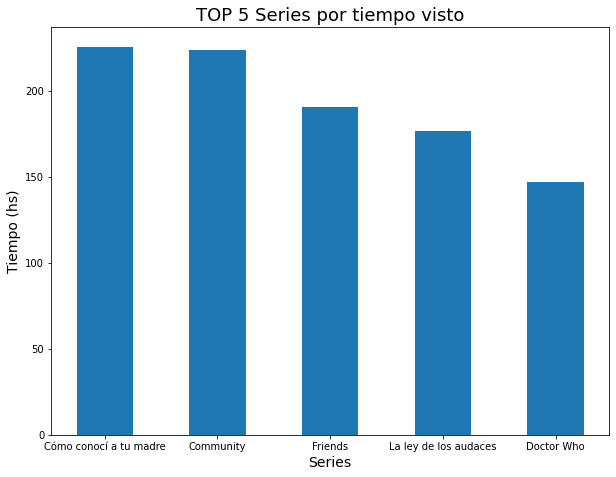

In [22]:
fig = plt.figure(figsize = (cantidadTopTiempo * 2, cantidadTopTiempo * 1.5))
plt.bar(peli_duracion.keys(), peli_duracion.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Tiempo (hs)', fontSize=14)

plt.title("TOP " + str(cantidadTopTiempo) + " Series por tiempo visto", fontSize = 18)
plt.show()

##### Por ocurrencias

Guardando en un dataframe los titulos y las ocurrencias de cada serie

In [23]:
series_occurrences = df_series.groupby(["Title"]).size().reset_index()
series_occurrences = series_occurrences.rename(columns = {0:"Occurrences"})
series_occurrences = series_occurrences.sort_values(by = "Occurrences", ascending = False).reset_index()

Creando un diccionario que contiene como keys los titulos de las peliculas y como valores su numero de ocurrencias correspondiente

In [24]:
peli_ocurrencia = {}

cantidadTopOcurrencias = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidadTopOcurrencias:
  title = series_occurrences["Title"][i]
  occurrences = series_occurrences["Occurrences"][i]
  peli_ocurrencia[title] = occurrences
  i += 1

De cuantas series desea hacer el top: 5


Creando un grafico basado en el diccionario

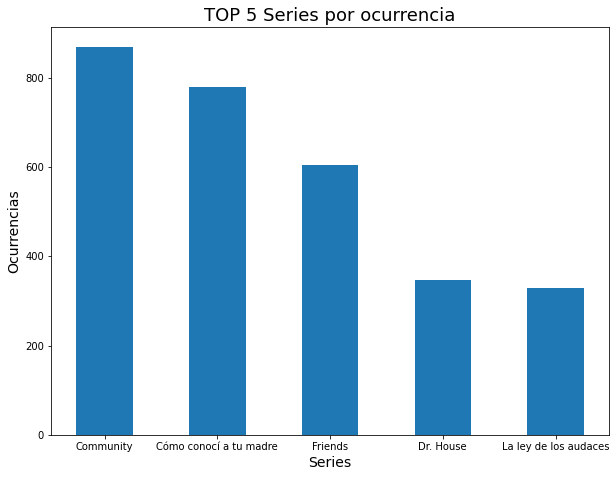

In [25]:
fig = plt.figure(figsize = (cantidadTopOcurrencias * 2, cantidadTopOcurrencias * 1.5))
plt.bar(peli_ocurrencia.keys(), peli_ocurrencia.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Ocurrencias', fontSize=14)

plt.title("TOP " + str(cantidadTopOcurrencias) + " Series por ocurrencia", fontSize = 18)
plt.show()

#### Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

In [31]:
def definirAño(input):
  return input.split('-')[0]

df["Year"] = df["Start Time"].apply(definirAño)

#### Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

Creando una columna con los titulos simplificados

In [81]:
df["Simple Title"] = df["Title"].apply(simplifyTitle)

Guardando en un diccionario como keys los años y como valores la cantidad de titulos correspondiente

In [120]:
titulosTotal = df.groupby(["Simple Title", "Year"]).size().reset_index()

añosVistos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

años_titulos = {}

for i in añosVistos:
  años_titulos[i] = titulosTotal[titulosTotal["Year"] == i][0].count()

años_titulos

{'2015': 81,
 '2016': 39,
 '2017': 78,
 '2018': 52,
 '2019': 45,
 '2020': 29,
 '2021': 26,
 '2022': 11}

Graficando la variación a traves de los años usando el diccionario

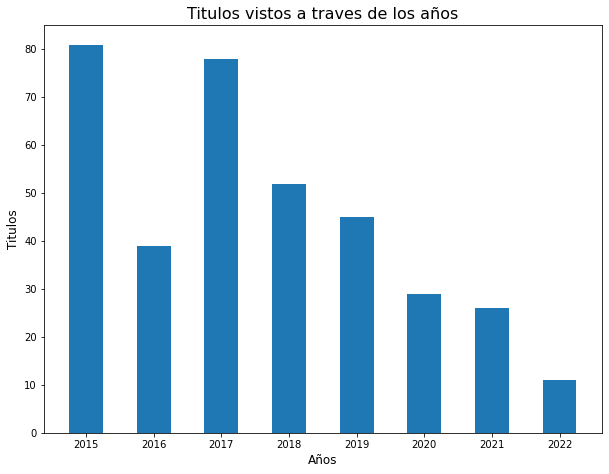

In [121]:
fig = plt.figure(figsize = (10, 7.5))
plt.bar(años_titulos.keys(), años_titulos.values(), width = 0.5)

plt.xlabel("Años", fontSize = 12)
plt.ylabel("Titulos", fontSize = 12)

plt.title("Titulos vistos a traves de los años", fontSize = 16)
plt.show()

#### Total de días de todos los títulos reproducidos.

In [122]:
totalDias = int(df["Duration"].sum() / 60 / 60 / 24)
print("El total de días de todos los títulos reproducidos es " + str(totalDias))

El total de días de todos los títulos reproducidos es 99


## Mostrando el dataframe

In [26]:
original_df = pd.read_csv("NetflixHistory.csv")

In [ ]:
df